# MVP_Bojado

## Imports

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Web Scraping Libraries
import urllib
import requests
from bs4 import BeautifulSoup

# Regex Library
import re

# Time-related Libraries
import time
from datetime import timedelta, datetime

# Geo-mapping Libraries
import geopandas
import geopy
import folium 

# NLP Libraries
import spacy
import unicodedata
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords
from wordcloud import WordCloud

# Import .py files
import MVP_Shi

# Warnings
import warnings
warnings.filterwarnings("ignore")

# Acquire and Prepare

In [2]:
# Acquired and Prepared Json file
df = pd.read_json("df_ds_tx_prepared.json") 
df.head()   

,date,title,company,company_rating,job_link,job_description,city,state,zipcode,clean,tokenized,stemmed,lemmatized
0,2021-02-03,Data Scientist Sr. Associate\nnew,"JPMorgan Chase Bank, N.A.",3.9,https://www.indeed.com/rc/clk?jk=dfd1ed6ece073...,The Data Scientist is an individual contributo...,Lewisville,TX,0,data scientist individual contributor able app...,the data scientist is an individual contributo...,the data scientist is an individu contributor ...,the data scientist is an individual contributo...
1,2021-02-03,Data Scientist\nnew,Booz Allen Hamilton,3.9,https://www.indeed.com/rc/clk?jk=246ba9f708c3e...,The Challenge:\nAre you excited at the prospec...,San Antonio,TX,0,challenge excited prospect unlocking secret he...,the challenge\nare you excited at the prospect...,the challeng are you excit at the prospect of ...,the challenge are you excited at the prospect ...
2,2021-02-03,Human Performance Data Analyst Mid/Sr\nnew,Booz Allen Hamilton,3.9,https://www.indeed.com/rc/clk?jk=2538d333374b7...,Key Role:\nServe as a Human Performance Data A...,San Antonio,TX,0,key role serve human performance data analyst ...,key role\nserve as a human performance data an...,key role serv as a human perform data analyst ...,key role serve a a human performance data anal...
3,2021-02-03,Professional-Data Scientist\nnew,AT&T,3.7,https://www.indeed.com/rc/clk?jk=c4841a42f1129...,Overall Purpose: THIS JOB REQUIRES SPECIAL APP...,Plano,TX,0,overall purpose job requires special approval ...,overall purpose this job requires special appr...,overal purpos thi job requir special approv fr...,overall purpose this job requires special appr...
4,2021-02-03,Sr. Data Scientist (Remote)\nnew,Ayasdi,2.3,https://www.indeed.com/rc/clk?jk=57ec78190a3c2...,Ayasdi is breaking new ground in enterprise AI...,Austin,TX,78708,ayasdi breaking new ground enterprise ai looki...,ayasdi is breaking new ground in enterprise ai...,ayasdi is break new ground in enterpris ai and...,ayasdi is breaking new ground in enterprise ai...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1270 entries, 0 to 1269
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             1270 non-null   datetime64[ns]
 1   title            1270 non-null   object        
 2   company          1270 non-null   object        
 3   company_rating   1270 non-null   float64       
 4   job_link         1270 non-null   object        
 5   job_description  1270 non-null   object        
 6   city             1270 non-null   object        
 7   state            1270 non-null   object        
 8   zipcode          1270 non-null   int64         
 9   clean            1270 non-null   object        
 10  tokenized        1270 non-null   object        
 11  stemmed          1270 non-null   object        
 12  lemmatized       1270 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(10)
memory usage: 129.1+ KB


# Explore

In [4]:
# Create a general library for all skills
general_library = ['python', 'sql', 'pandas','numpy','matplotlib','scikit learn','spark','hadoop',
           'aws','amazon web services','azure','microsoft word','microsoft excel','excel',
           'tableau','tensor flow','pytorch','hive', 'impala', 'matlab','etl',
           'statistics','exploration', 'extraction', 'data wrangling','math',
           'machine learning','data visualization','java','js',
           'javascript','scala','r','c','c++','power bi','dashboard','linear algebra',
           'calculus','neural networks','eda','big data','frameworks','database management',
           'testing hypotheses','probability','data mining','perl','nosql','saas','git',
           'github','natural language processing','nlp','deep learning','agile','kanban',
           'project management','julia','devops','google cloud','pytorch','computer vision',
           'critical thinking','communication','problem solving','teamwork','ethics','business acumen',
           'interpersonal skills','curiosity','storytelling','adaptability','team player','collaboration',
           'learning','time management','leadership','domain knowledge','creativity','decision making',
           'verbal communication','written communication'] 

In [5]:
def top_general_skills_ds_v1(k):
    '''
    This function accepts a positive integer k and 
    returns a dataframe containing the top k skills needed
    for data scientist positions.
    '''
    # Load the prepared dataframe with job search results
    df = pd.read_json("df_ds_tx_prepared.json")
    # Create a string of all words that appear in the job description
    dic = MVP_Shi.words_variables_v1(df)
    # Compute the words frequency
    df_word_frequency = MVP_Shi.word_frequency_v1(dic)
    # Define a library that has a complete sillset for data scientist
    general_library = ['python', 'sql', 'pandas','numpy','matplotlib','scikit learn','spark','hadoop',
           'aws','amazon web services','azure','microsoft word','microsoft excel','excel',
           'tableau','tensor flow','pytorch','hive', 'impala', 'matlab','etl',
           'statistics','exploration', 'extraction', 'data wrangling','math',
           'machine learning','data visualization','java','js',
           'javascript','scala','r','c','c++','power bi','dashboard','linear algebra',
           'calculus','neural networks','eda','big data','frameworks','database management',
           'testing hypotheses','probability','data mining','perl','nosql','saas','git',
           'github','natural language processing','nlp','deep learning','agile','kanban',
           'project management','julia','devops','google cloud','pytorch','computer vision',
           'critical thinking','communication','problem solving','teamwork','ethics','business acumen',
           'interpersonal skills','curiosity','storytelling','adaptability','team player','collaboration',
           'learning','time management','leadership','domain knowledge','creativity','decision making',
           'verbal communication','written communication']
    # Create a empty dataframe to hold the rank of the skills
    df_skills = pd.DataFrame()
    # For loop through the library to find out the frequency of the skills mentioned in the job description
    for skill in general_library:
        mask = (df_word_frequency.index == skill)
        df = df_word_frequency[mask]
        df_skills = pd.concat([df_skills, df])
    df_skills.sort_values(by='frequency', ascending=False, inplace=True)
    return df_skills.head(k)

In [6]:
df = top_general_skills_ds_v1(5)
df

,frequency
learning,2878
python,1072
communication,886
sql,811
r,603


In [7]:
# Create a tech library
tech_library = ['python', 'sql', 'pandas','numpy','matplotlib','scikit learn','spark','hadoop',
           'aws','amazon web services','azure','microsoft word','microsoft excel','excel',
           'tableau','tensor flow','pytorch','hive', 'impala', 'matlab','etl',
           'statistics','exploration', 'extraction', 'data wrangling','math',
           'machine learning','data visualization','java','js',
           'javascript','scala','r','c','c++','power bi','dashboard','linear algebra',
           'calculus','neural networks','eda','big data','frameworks','database management',
           'testing hypotheses','probability','data mining','perl','nosql','saas','git',
           'github','natural language processing','nlp','deep learning','agile','kanban',
           'project management','julia','devops','google cloud','pytorch','computer vision']

In [8]:
def top_tech_skills_ds_v1(k):
    '''
    This function accepts a positive integer k and 
    returns a dataframe containing the top k skills needed
    for data scientist positions.
    '''

    # Load the prepared dataframe with job search results
    df = pd.read_json("df_ds_tx_prepared.json")
    # Create a string of all words that appear in the job description
    dic = MVP_Shi.words_variables_v1(df)
    # Compute the words frequency
    df_word_frequency = MVP_Shi.word_frequency_v1(dic)
    # Define a library that has a complete sillset for data scientist
    tech_library = ['python', 'sql', 'pandas','numpy','matplotlib','scikit learn','spark','hadoop',
           'aws','amazon web services','azure','microsoft word','microsoft excel','excel',
           'tableau','tensor flow','pytorch','hive', 'impala', 'matlab','etl',
           'statistics','exploration', 'extraction', 'data wrangling','math',
           'machine learning','data visualization','java','js',
           'javascript','scala','r','c','c++','power bi','dashboard','linear algebra',
           'calculus','neural networks','eda','big data','frameworks','database management',
           'testing hypotheses','probability','data mining','perl','nosql','saas','git',
           'github','natural language processing','nlp','deep learning','agile','kanban',
           'project management','julia','devops','google cloud','pytorch','computer vision']
    # Create a empty dataframe to hold the rank of the skills
    df_skills = pd.DataFrame()
    # For loop through the library to find out the frequency of the skills mentioned in the job description
    for skill in tech_library:
        mask = (df_word_frequency.index == skill)
        df = df_word_frequency[mask]
        df_skills = pd.concat([df_skills, df])
    df_skills.sort_values(by='frequency', ascending=False, inplace=True)
    return df_skills.head(k)

In [9]:
# Single word, top tech skills
df = top_tech_skills_ds_v1(5)
df

,frequency
python,1072
sql,811
r,603
aws,568
spark,472


In [10]:
# Create a soft skills library
soft_library = ['critical thinking','communication','problem solving','teamwork','ethics','business acumen',
           'interpersonal skills','curiosity','storytelling','adaptability','team player','collaboration',
           'learning','time management','leadership','domain knowledge','creativity','decision making',
           'verbal communication','written communication']

In [11]:
def top_soft_skills_ds_v1(k):
    '''
    This function accepts a positive integer k and 
    returns a dataframe containing the top k skills needed
    for data scientist positions.
    '''

    # Load the prepared dataframe with job search results
    df = pd.read_json("df_ds_tx_prepared.json")
    # Create a string of all words that appear in the job description
    dic = MVP_Shi.words_variables_v1(df)
    # Compute the words frequency
    df_word_frequency = MVP_Shi.word_frequency_v1(dic)
    # Define a library that has a complete sillset for data scientist
    soft_library = ['critical thinking','communication','problem solving','teamwork','ethics','business acumen',
           'interpersonal skills','curiosity','storytelling','adaptability','team player','collaboration',
           'learning','time management','leadership','domain knowledge','creativity','decision making',
           'verbal communication','written communication']
    # Web scraped soft skills library to add
    df_online_list = pd.read_csv("soft_skills_cleaned")
    online_list = df_online_list['0'].to_list()
    # Combine both libraries
    combined_libraries = soft_library + online_list
    # Create a empty dataframe to hold the rank of the skills
    df_skills = pd.DataFrame()
    # For loop through the library to find out the frequency of the skills mentioned in the job description
    for skill in combined_libraries:
        mask = (df_word_frequency.index == skill)
        df = df_word_frequency[mask]
        df_skills = pd.concat([df_skills, df])
    df_skills.sort_values(by='frequency', ascending=False, inplace=True)
    return df_skills.head(k)

In [12]:
# Single word, top soft skills
df = top_soft_skills_ds_v1(5)
df

,frequency
learning,2878
communication,886
leadership,579
collaboration,279
curiosity,78


# Time Series

In [15]:
# Acquired DS json file 
df_ds_ts = pd.read_json("df_ds_tx_prepared_backup.json") 
df_ds_ts.head() 

,date,title,company,company_rating,job_link,job_description,city,state,zipcode,clean
0,2021-02-23,Senior Data Scientist - ProServe,"Amazon Web Services, Inc.",3.6,https://www.indeed.com/rc/clk?jk=244b52fdf1a25...,\nBachelor’s degree in a highly quantitative f...,San Antonio,TX,0,bachelor degree highly quantitative field comp...
1,2021-02-23,Supply Chain Data Analyst,EthosEnergy Group,3.3,https://www.indeed.com/rc/clk?jk=83cbe651fdfb2...,Job Overview\nThe Supply Chain Data Analyst se...,Houston,TX,77092,job overview supply chain data analyst seek co...
2,2021-02-23,"Sr. Technical Product Manager, Digital Machine...",Apple,4.2,https://www.indeed.com/rc/clk?jk=c62329422529e...,"Summary\nPosted: Feb 22, 2021\nWeekly Hours: 4...",Austin,TX,0,summary posted feb 22 2021 weekly hour 40 role...
3,2021-02-23,Associate Data Scientist,Southwest Airlines Co.,4.3,https://www.indeed.com/rc/clk?jk=ca6fb6db72448...,Overview:\n\nSouthwest will provide a stable w...,Dallas,TX,75235,overview southwest provide stable work environ...
4,2021-02-23,Senior Data Scientist,Hewlett Packard Enterprise,3.8,https://www.indeed.com/rc/clk?jk=6cfebd31701b4...,Hewlett Packard Enterprise (HPE) advances the ...,Austin,TX,78758,hewlett packard enterprise hpe advance way peo...


In [16]:
df_ds_ts.shape 

(2234, 10)

In [17]:
df_ds_ts.index = pd.to_datetime(df_ds_ts.index)
df_ds_ts.dtypes

date               datetime64[ns]
title                      object
company                    object
company_rating            float64
job_link                   object
job_description            object
city                       object
state                      object
zipcode                     int64
clean                      object
dtype: object

In [18]:
df_ds_ts.isnull().sum() # number null values in each column

date               0
title              0
company            0
company_rating     0
job_link           0
job_description    0
city               0
state              0
zipcode            0
clean              0
dtype: int64

In [19]:
df_ds_ts['year'] = df_ds_ts.date.dt.year
df_ds_ts['month'] = df_ds_ts.date.dt.month
df_ds_ts['day'] = df_ds_ts.date.dt.day
df_ds_ts['weekday'] = df_ds_ts.date.dt.day_name()
df_ds_ts.head()

,date,title,company,company_rating,job_link,job_description,city,state,zipcode,clean,year,month,day,weekday
1970-01-01 00:00:00.000000000,2021-02-23,Senior Data Scientist - ProServe,"Amazon Web Services, Inc.",3.6,https://www.indeed.com/rc/clk?jk=244b52fdf1a25...,\nBachelor’s degree in a highly quantitative f...,San Antonio,TX,0,bachelor degree highly quantitative field comp...,2021,2,23,Tuesday
1970-01-01 00:00:00.000000001,2021-02-23,Supply Chain Data Analyst,EthosEnergy Group,3.3,https://www.indeed.com/rc/clk?jk=83cbe651fdfb2...,Job Overview\nThe Supply Chain Data Analyst se...,Houston,TX,77092,job overview supply chain data analyst seek co...,2021,2,23,Tuesday
1970-01-01 00:00:00.000000002,2021-02-23,"Sr. Technical Product Manager, Digital Machine...",Apple,4.2,https://www.indeed.com/rc/clk?jk=c62329422529e...,"Summary\nPosted: Feb 22, 2021\nWeekly Hours: 4...",Austin,TX,0,summary posted feb 22 2021 weekly hour 40 role...,2021,2,23,Tuesday
1970-01-01 00:00:00.000000003,2021-02-23,Associate Data Scientist,Southwest Airlines Co.,4.3,https://www.indeed.com/rc/clk?jk=ca6fb6db72448...,Overview:\n\nSouthwest will provide a stable w...,Dallas,TX,75235,overview southwest provide stable work environ...,2021,2,23,Tuesday
1970-01-01 00:00:00.000000004,2021-02-23,Senior Data Scientist,Hewlett Packard Enterprise,3.8,https://www.indeed.com/rc/clk?jk=6cfebd31701b4...,Hewlett Packard Enterprise (HPE) advances the ...,Austin,TX,78758,hewlett packard enterprise hpe advance way peo...,2021,2,23,Tuesday


In [20]:
# Date made into the index
df_ds_ts = df_ds_ts.set_index('date').sort_index()
df_ds_ts.head()

,title,company,company_rating,job_link,job_description,city,state,zipcode,clean,year,month,day,weekday
date,,,,,,,,,,,,,
2020-12-22,Customer Success Manager,ScienceLogic,3.0,https://www.indeed.com/rc/clk?jk=57c972a1bdb17...,What we're looking for…\n\nScienceLogic is loo...,0,TX,0,looking sciencelogic looking customer success ...,2020,12,22,Tuesday
2020-12-22,"Senior Product Manager, Data Science",realtor.com,3.3,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,Realtor.com is your one stop shop for homebuye...,Austin,TX,0,realtorcom one stop shop homebuyers seller dre...,2020,12,22,Tuesday
2020-12-22,"Entry-Level Data Positions (Data Engineer, Mac...",Citi,3.9,https://www.indeed.com/rc/clk?jk=d2e8a5eaac52a...,Citi Consumer Technology is seeking dozens of ...,Irving,TX,75062,citi consumer technology seeking dozen talente...,2020,12,22,Tuesday
2020-12-22,Principal Data Scientist (Clinical Data Manage...,Premier Research Group Limited,3.1,https://www.indeed.com/rc/clk?jk=7456257a75475...,Premier Research helps highly innovative biote...,Austin,TX,0,premier research help highly innovative biotec...,2020,12,22,Tuesday
2020-12-22,"Data Scientist, Process Sciences",Molecular Templates Inc,3.5,https://www.indeed.com/rc/clk?jk=d7958c8480819...,Company Description:\nMolecular Templates (MTE...,Austin,TX,78728,company description molecular template mtem cl...,2020,12,22,Tuesday


In [21]:
# Start and end dates of current data 
df_ds_ts.index.min(), df_ds_ts.index.max()

(Timestamp('2020-12-22 00:00:00'), Timestamp('2021-02-23 00:00:00'))

In [22]:
df_ds_ts.resample('1W').mean() # Every week company rating averaged

,company_rating,zipcode,year,month,day
date,,,,,
2020-12-27,3.023724,33082.604592,2020.000000,12.000000,22.892857
2021-01-03,2.724265,43849.705882,2020.389706,7.713235,19.051471
2021-01-10,2.687736,38684.825472,2021.000000,1.000000,7.160377
2021-01-17,3.321390,33349.422460,2021.000000,1.000000,13.417112
2021-01-24,3.011648,37464.142045,2021.000000,1.000000,21.042614
2021-01-31,2.971918,44279.715753,2021.000000,1.000000,27.667808
2021-02-07,3.039382,31341.528958,2021.000000,2.000000,3.370656
2021-02-14,3.218631,33601.110266,2021.000000,2.000000,11.091255
2021-02-21,3.218919,33715.900901,2021.000000,2.000000,18.783784


In [25]:
# Add in NLP function
def ts_top_general_skills_ds(k):
    '''
    This function accepts a positive integer k and 
    returns a dataframe containing the top k skills needed
    for data scientist positions.
    '''
    # Load the prepared dataframe with job search results
    df = pd.read_json("df_ds_tx_prepared_backup.json")
    # Create a string of all words that appear in the job description
    dic = MVP_Shi.words_variables_v1(df)
    # Compute the words frequency
    df_word_frequency = MVP_Shi.word_frequency_v1(dic)
    # Define a library that has a complete sillset for data scientist
    general_library = ['python', 'sql', 'pandas','numpy','matplotlib','scikit learn','spark','hadoop',
           'aws','amazon web services','azure','microsoft word','microsoft excel','excel',
           'tableau','tensor flow','pytorch','hive', 'impala', 'matlab','etl',
           'statistics','exploration', 'extraction', 'data wrangling','math',
           'machine learning','data visualization','java','js',
           'javascript','scala','r','c','c++','power bi','dashboard','linear algebra',
           'calculus','neural networks','eda','big data','frameworks','database management',
           'testing hypotheses','probability','data mining','perl','nosql','saas','git',
           'github','natural language processing','nlp','deep learning','agile','kanban',
           'project management','julia','devops','google cloud','pytorch','computer vision',
           'critical thinking','communication','problem solving','teamwork','ethics','business acumen',
           'interpersonal skills','curiosity','storytelling','adaptability','team player','collaboration',
           'time management','leadership','domain knowledge','creativity','decision making',
           'verbal communication','written communication']
    # Create a empty dataframe to hold the rank of the skills
    df_skills = pd.DataFrame()
    # For loop through the library to find out the frequency of the skills mentioned in the job description
    for skill in general_library:
        mask = (df_word_frequency.index == skill)
        df = df_word_frequency[mask]
        df_skills = pd.concat([df_skills, df])
    df_skills.sort_values(by='frequency', ascending=False, inplace=True)
    return df_skills.head(k)

In [31]:
df_top = ts_top_general_skills_ds(5)
df_top

,frequency
python,1798
communication,1542
sql,1379
aws,1040
r,1000


In [ ]:
# We'd have to make it a column of the main df or concat it over?? 
# Or can we just extract it from the "clean" data column?
# We would also want to make the top 5 skills to not to exclusively labelled
# and want the system to automatically detect the top 5 without a label 


In [ ]:
labels = pd.concat([df.label.value_counts(),
                    df.label.value_counts(normalize=True)], axis=1)
labels.columns = ['n', 'percent']
labels

In [33]:
# Top skills converting to time series analysis 
python_ts = df_top.values_counts().head()
communicatiom_ts = df
sql_ts = df
aws_ts = df
r_ts = df

AttributeError: 'DataFrame' object has no attribute 'values_counts'

<AxesSubplot:xlabel='date'>

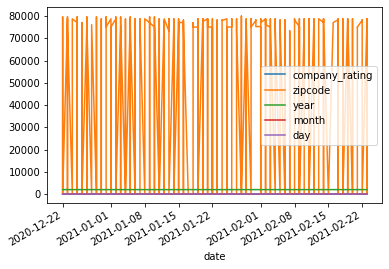

In [10]:
df_ds_ts.plot()

<AxesSubplot:xlabel='date'>

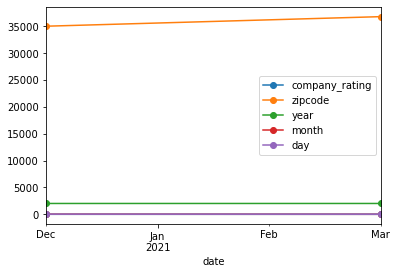

In [11]:
df_ds_ts.resample('3M').mean().plot(marker='o')


In [ ]:
Train, Test, Validate Data 

In [12]:
y.resample('D').mean().plot(alpha=.5, label='Daily')
y.resample('W').mean().plot(alpha=.8, label='Weekly')
y.resample('M').mean().plot(label='Montly')
y.resample('Y').mean().plot(label='Yearly')
plt.legend()

NameError: name 'y' is not defined

In [ ]:
df_ds_ts

In [6]:
# Acquired WD json file
df_wd_timeseries = pd.read_json("df_wd_tx_prepared_backup.json") 
df_wd_timeseries.head() 

,date,title,company,company_rating,job_link,job_description,city,state,zipcode,clean
0,2021-02-23,UI AngularJS Bootstrap Developer,iboss,3.2,https://www.indeed.com/rc/clk?jk=7b562f4350e26...,Company Overview\niboss is a cloud security co...,Austin,TX,0,company overview iboss cloud security company ...
1,2021-02-23,Senior UI Developer – React,Cognizant Technology Solutions,0.0,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,Senior UI Developer – React Cognizant Interact...,Dallas-Fort Worth,TX,0,senior ui developer react cognizant interactiv...
2,2021-02-23,Security Engineer,Box,5.0,https://www.indeed.com/rc/clk?jk=de94237091d9c...,WHAT IS BOX?\nBox is the market leader for Clo...,Austin,TX,0,box box market leader cloud content management...
3,2021-02-23,Behavioral Health Therapist PHP - Full Time Da...,Texas Health Resources,3.9,https://www.indeed.com/rc/clk?jk=f010cad109fdd...,Texas Health H-E-B seeks to hire a Behavioral ...,Bedford,TX,76022,texas health heb seek hire behavioral health t...
4,2021-02-23,Full Stack Java Software Engineer,"JPMorgan Chase Bank, N.A.",3.9,https://www.indeed.com/rc/clk?jk=106f30609958b...,"Commercial Banking serves global clients, incl...",Plano,TX,0,commercial banking serf global client includin...


In [8]:
df_wd_timeseries.shape

(4285, 10)

# 4. Model

# 5. Conclusions